Import neccesary module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Import train dataset

In [8]:
df = pd.read_csv('./phishing_site_urls.csv')

Import tokenizer using Regexp

In [10]:
from nltk.tokenize import RegexpTokenizer

Import CountVectorizer to vectorize input

In [11]:
from sklearn.feature_extraction.text import CountVectorizer 

Create LogisticRegression function

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Create Pipeline for dataset flow

In [13]:
from sklearn.pipeline import make_pipeline
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression(solver='lbfgs', max_iter=100))

Mapping data & split dataset

In [14]:
df['Label'] = df['Label'].map({'bad':1, 'good': 0})
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)

Fit data & test

In [15]:
pipeline_ls.fit(trainX, trainY)
pipeline_ls.score(testX, testY)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9661416806832828

Print Score

Training Accuracy : 0.9807212949231692
Testing Accuracy : 0.9661416806832828

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      0.97      0.98    100545
        Good       0.91      0.97      0.94     36792

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

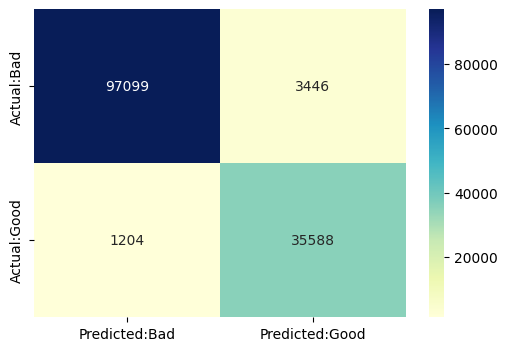

In [16]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Try another pipeline with different function

In [17]:
from sklearn.naive_bayes import MultinomialNB
pipeline_mnb = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), MultinomialNB())

In [18]:
pipeline_mnb.fit(trainX, trainY)
pipeline_mnb.score(testX, testY)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.962755848751611

Training Accuracy : 0.9741680400185433
Testing Accuracy : 0.962755848751611

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      0.96      0.97    100702
        Good       0.90      0.96      0.93     36635

    accuracy                           0.96    137337
   macro avg       0.94      0.96      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

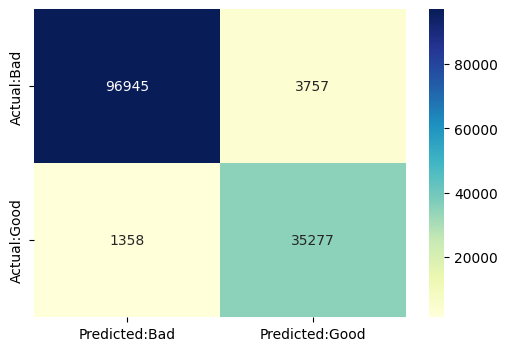

In [19]:
print('Training Accuracy :',pipeline_mnb.score(trainX,trainY))
print('Testing Accuracy :',pipeline_mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

with LinearSVM:

In [20]:
from sklearn.svm import LinearSVC
pipeline_svm = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LinearSVC())

In [21]:
pipeline_svm.fit(trainX, trainY)
pipeline_svm.score(testX, testY)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9782141738934155

Training Accuracy : 0.9990388559473216
Testing Accuracy : 0.9782141738934155

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      0.98      0.98     98819
        Good       0.96      0.97      0.96     38518

    accuracy                           0.98    137337
   macro avg       0.97      0.98      0.97    137337
weighted avg       0.98      0.98      0.98    137337


CONFUSION MATRIX


<Axes: >

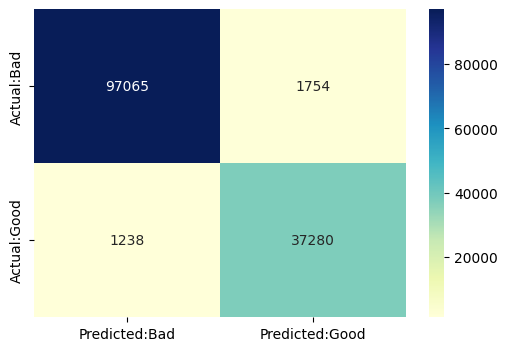

In [22]:
print('Training Accuracy :',pipeline_svm.score(trainX,trainY))
print('Testing Accuracy :',pipeline_svm.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_svm.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_svm.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Let try to predict

In [27]:
predict_bad = ['shazam.com','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']


In [28]:
pipeline_ls.predict(predict_bad)

array([0, 1, 1, 1])

In [29]:
pipeline_mnb.predict(predict_bad)

array([0, 1, 1, 1])

In [30]:
pipeline_svm.predict(predict_bad)

array([0, 1, 1, 1])

Finally export model

In [31]:
import joblib
joblib.dump(pipeline_ls, 'model-lg.pkl')
joblib.dump(pipeline_mnb, 'model-mnb.pkl')
joblib.dump(pipeline_svm, 'model-svm.pkl')

['model-svm.pkl']

ONNX model exort (In-development)

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
numeric_transformer = Pipeline(steps=[
    ('Vect', CountVectorizer(token_pattern=r'[A-Za-z]+', stop_words='english'))
])

model_ls = Pipeline(steps=[
    ('num', numeric_transformer),
    ('classifier', LogisticRegression())
])

In [34]:
model_ls.fit(trainX, trainY)
model_ls.score(testX, testY)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9661416806832828

Install convert lib

In [35]:
!pip install skl2onnx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 8.8 MB/s eta 0:00:00


In [36]:
from skl2onnx import convert_sklearn, to_onnx
from skl2onnx.common.data_types import StringTensorType

Add some sep for CountVectorizer

In [37]:
seps = {
    CountVectorizer: {
        "separators": [
            ' ', '.', '\\?', ',', ';', ':', '!',
            '\\(', '\\)', '\n', '"', "'",
            "-", "\\[", "\\]", "@"
        ]
    }
}

Now convert

In [53]:
model_onnx = convert_sklearn(
    model_ls, "Vect",
    initial_types=[("input", StringTensorType([None, 1]))],
    options=seps, target_opset=12)

Dumping out the model

In [54]:
with open('model.onnx', 'wb') as f:
  f.write(model_onnx.SerializePartialToString())

Reload model for checking

In [41]:
!pip install onnxruntime
import onnxruntime as rt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
sess = rt.InferenceSession('./model.onnx')

Get the input

In [68]:
newDf = [['facebook.com']]
inputs = {sess.get_inputs()[0].name: np.array(newDf[:1])}

Run the predict

In [69]:
pred_onx = sess.run(None, inputs)
print("predict", pred_onx[0])
print("predict_proba", pred_onx[1])

predict [1]
predict_proba [{0: 0.3689752221107483, 1: 0.6310247778892517}]
